In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [4]:
data = pd.read_csv('/content/concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

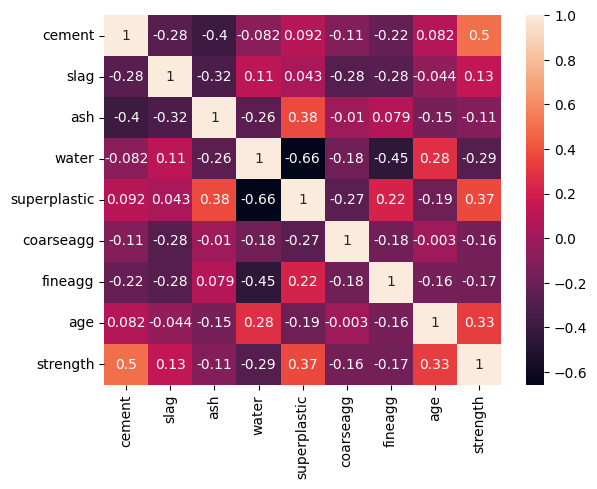

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
from sklearn import metrics

In [11]:
x = data.drop('strength', axis=1)
y = data["strength"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
print("Model Parameters")
print(model2.coef_)
print(model2.intercept_)
#With TV, Radio, Newspaper we get a more overfit model
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Model Parameters
[ 0.12879487  0.11305765  0.09671136 -0.10843652  0.30478554  0.02666245
  0.03673076  0.11295025]
-55.8459208298814
Training R2
0.6091692420327885
Testing R2
0.6316120065123334


From above accuracy we can confirm it to be Underfitting Model

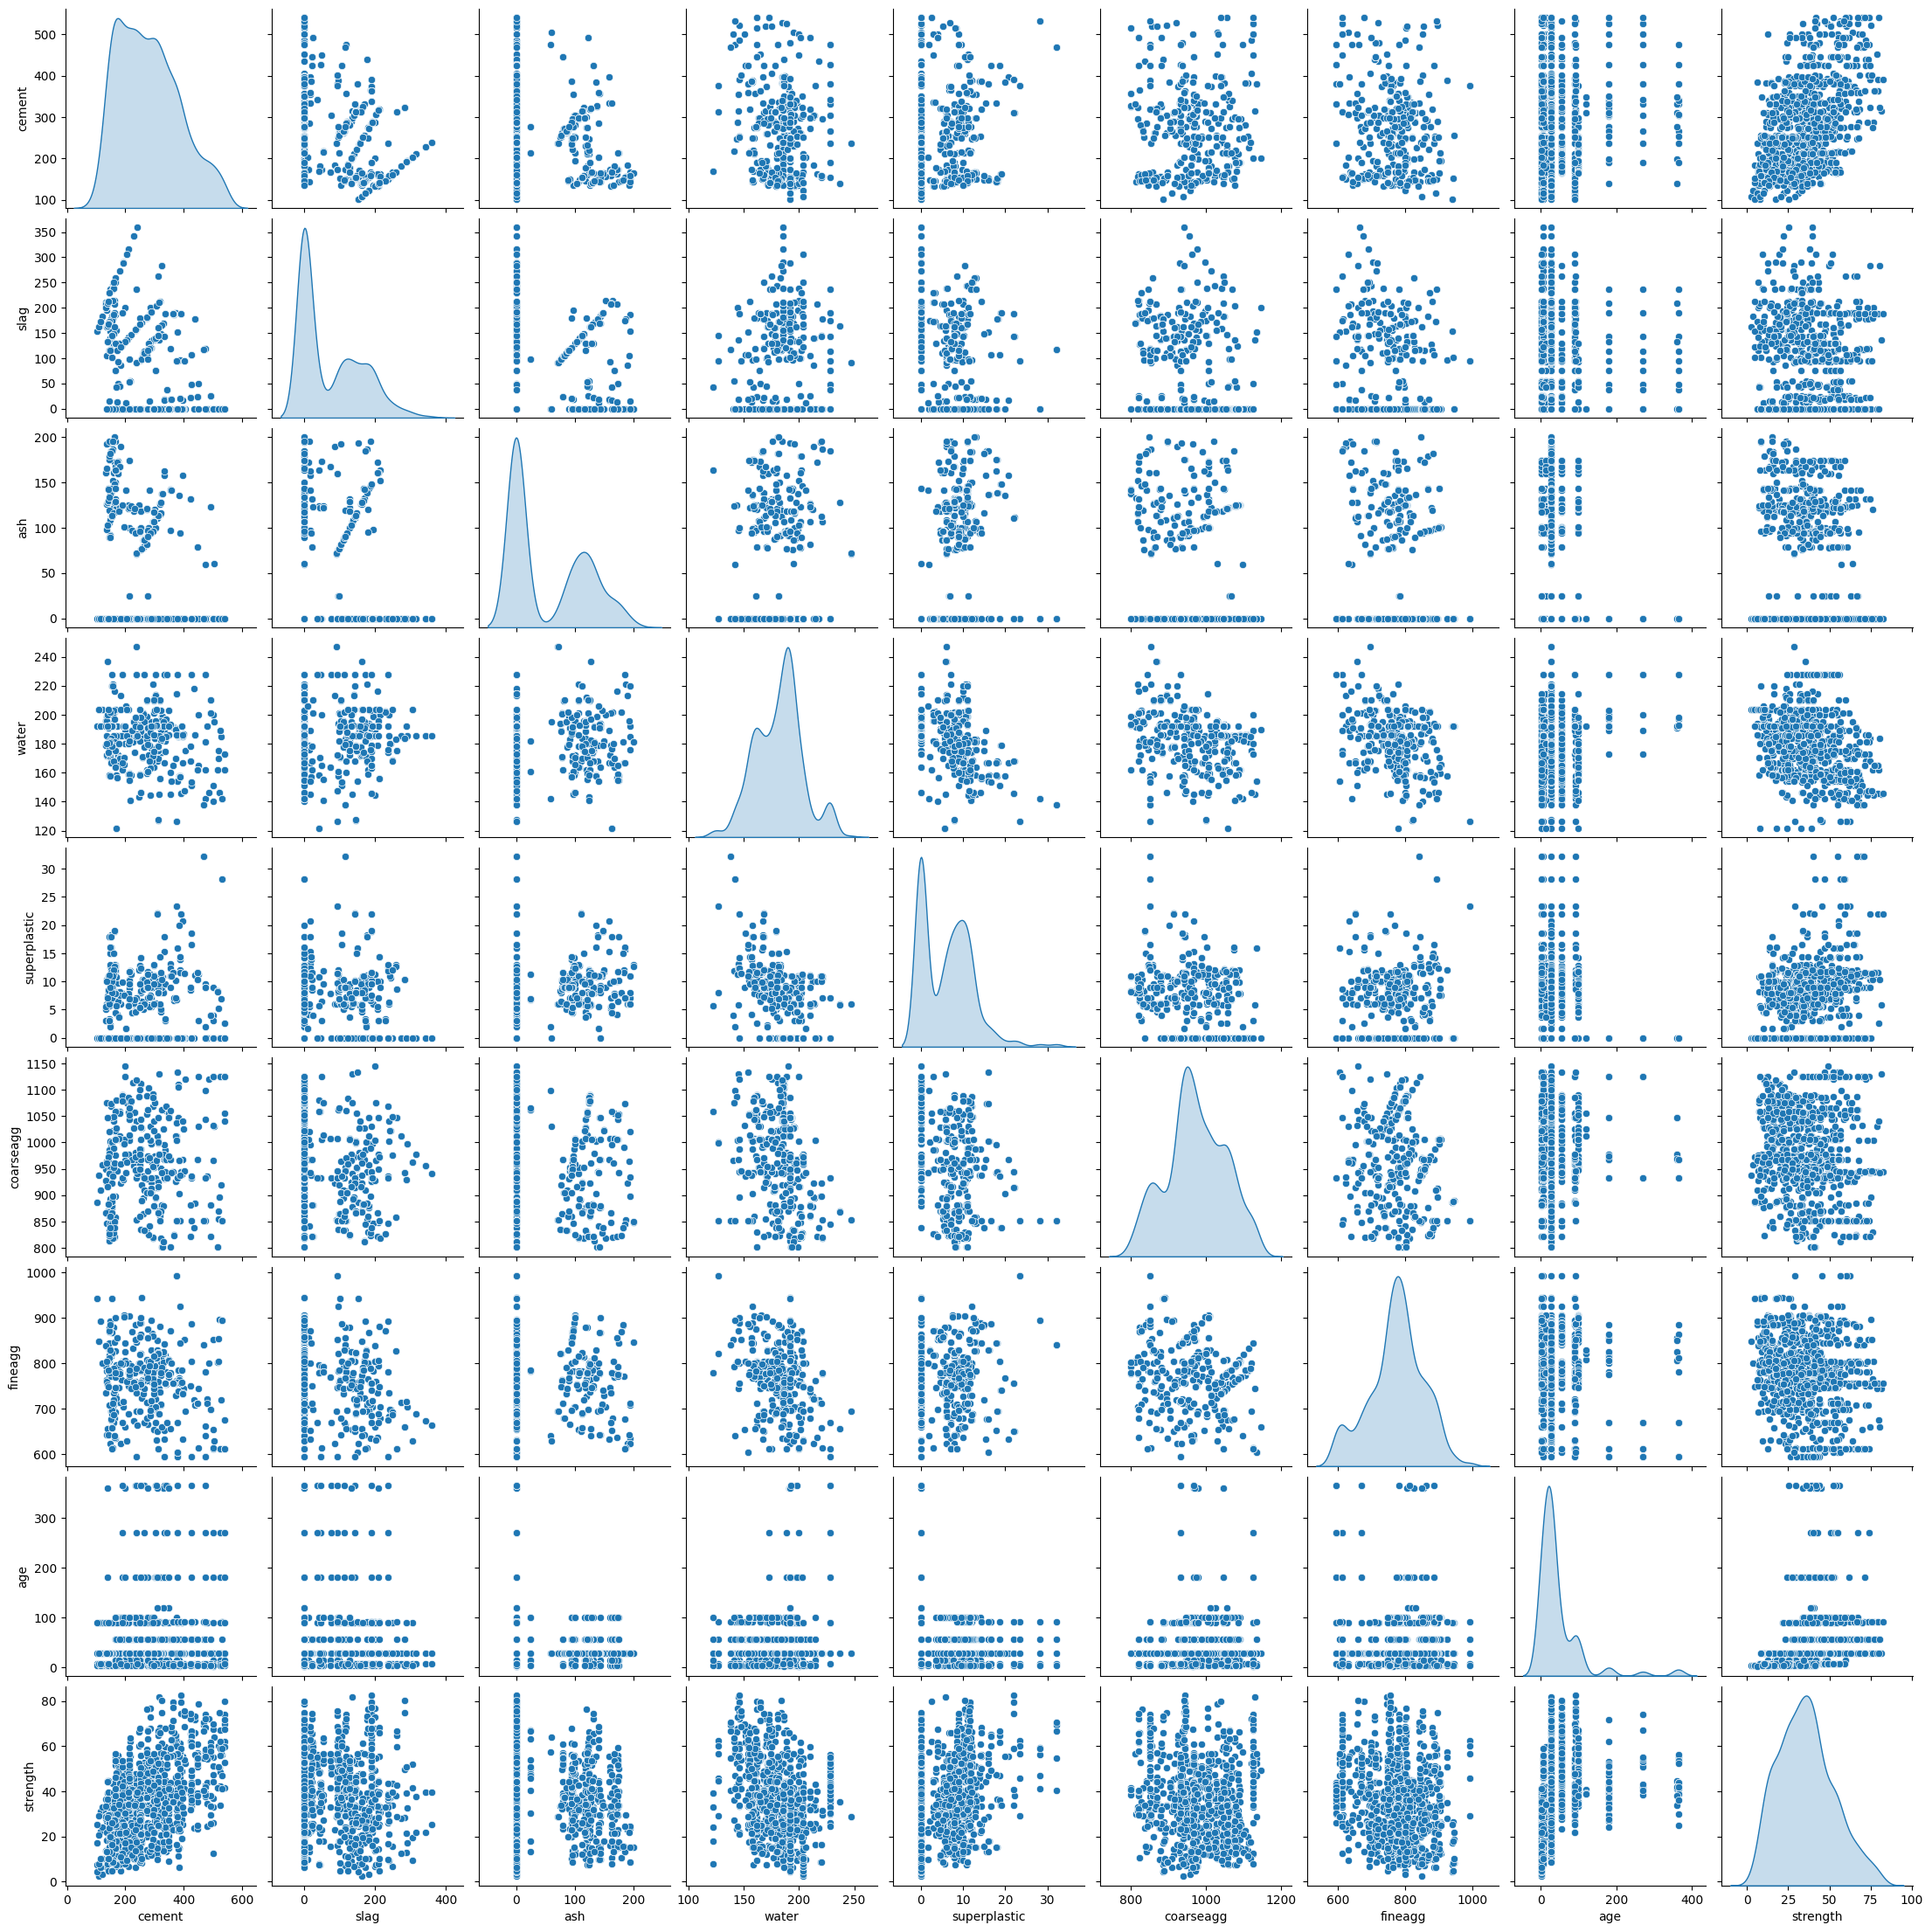

In [13]:
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [15]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(model2,x_train,y_train,cv=10)
print(scoreslr)
print("Mean R2")
print(np.mean(scoreslr))

[0.62324434 0.68109405 0.57194372 0.51792686 0.63491238 0.45327216
 0.66647036 0.58289259 0.67564169 0.48965133]
Mean R2
0.5897049477594781


In [16]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.metrics import mean_squared_error,r2_score
pt = PowerTransformer()
Ptrain = pt.fit_transform(x_train)
Ptest = pt.transform(x_test)
lr = LinearRegression()
lr.fit(Ptrain,y_train)
print("Training R2")
print(lr.score(Ptrain,y_train))
print("Testing R2")
print(lr.score(Ptest,y_test))
predicted=lr.predict(Ptest)
print("RMSE")
print(np.sqrt(mean_squared_error(y_test,predicted)))


Training R2
0.7966604485385335
Testing R2
0.8337764165255289
RMSE
6.9962653453433745


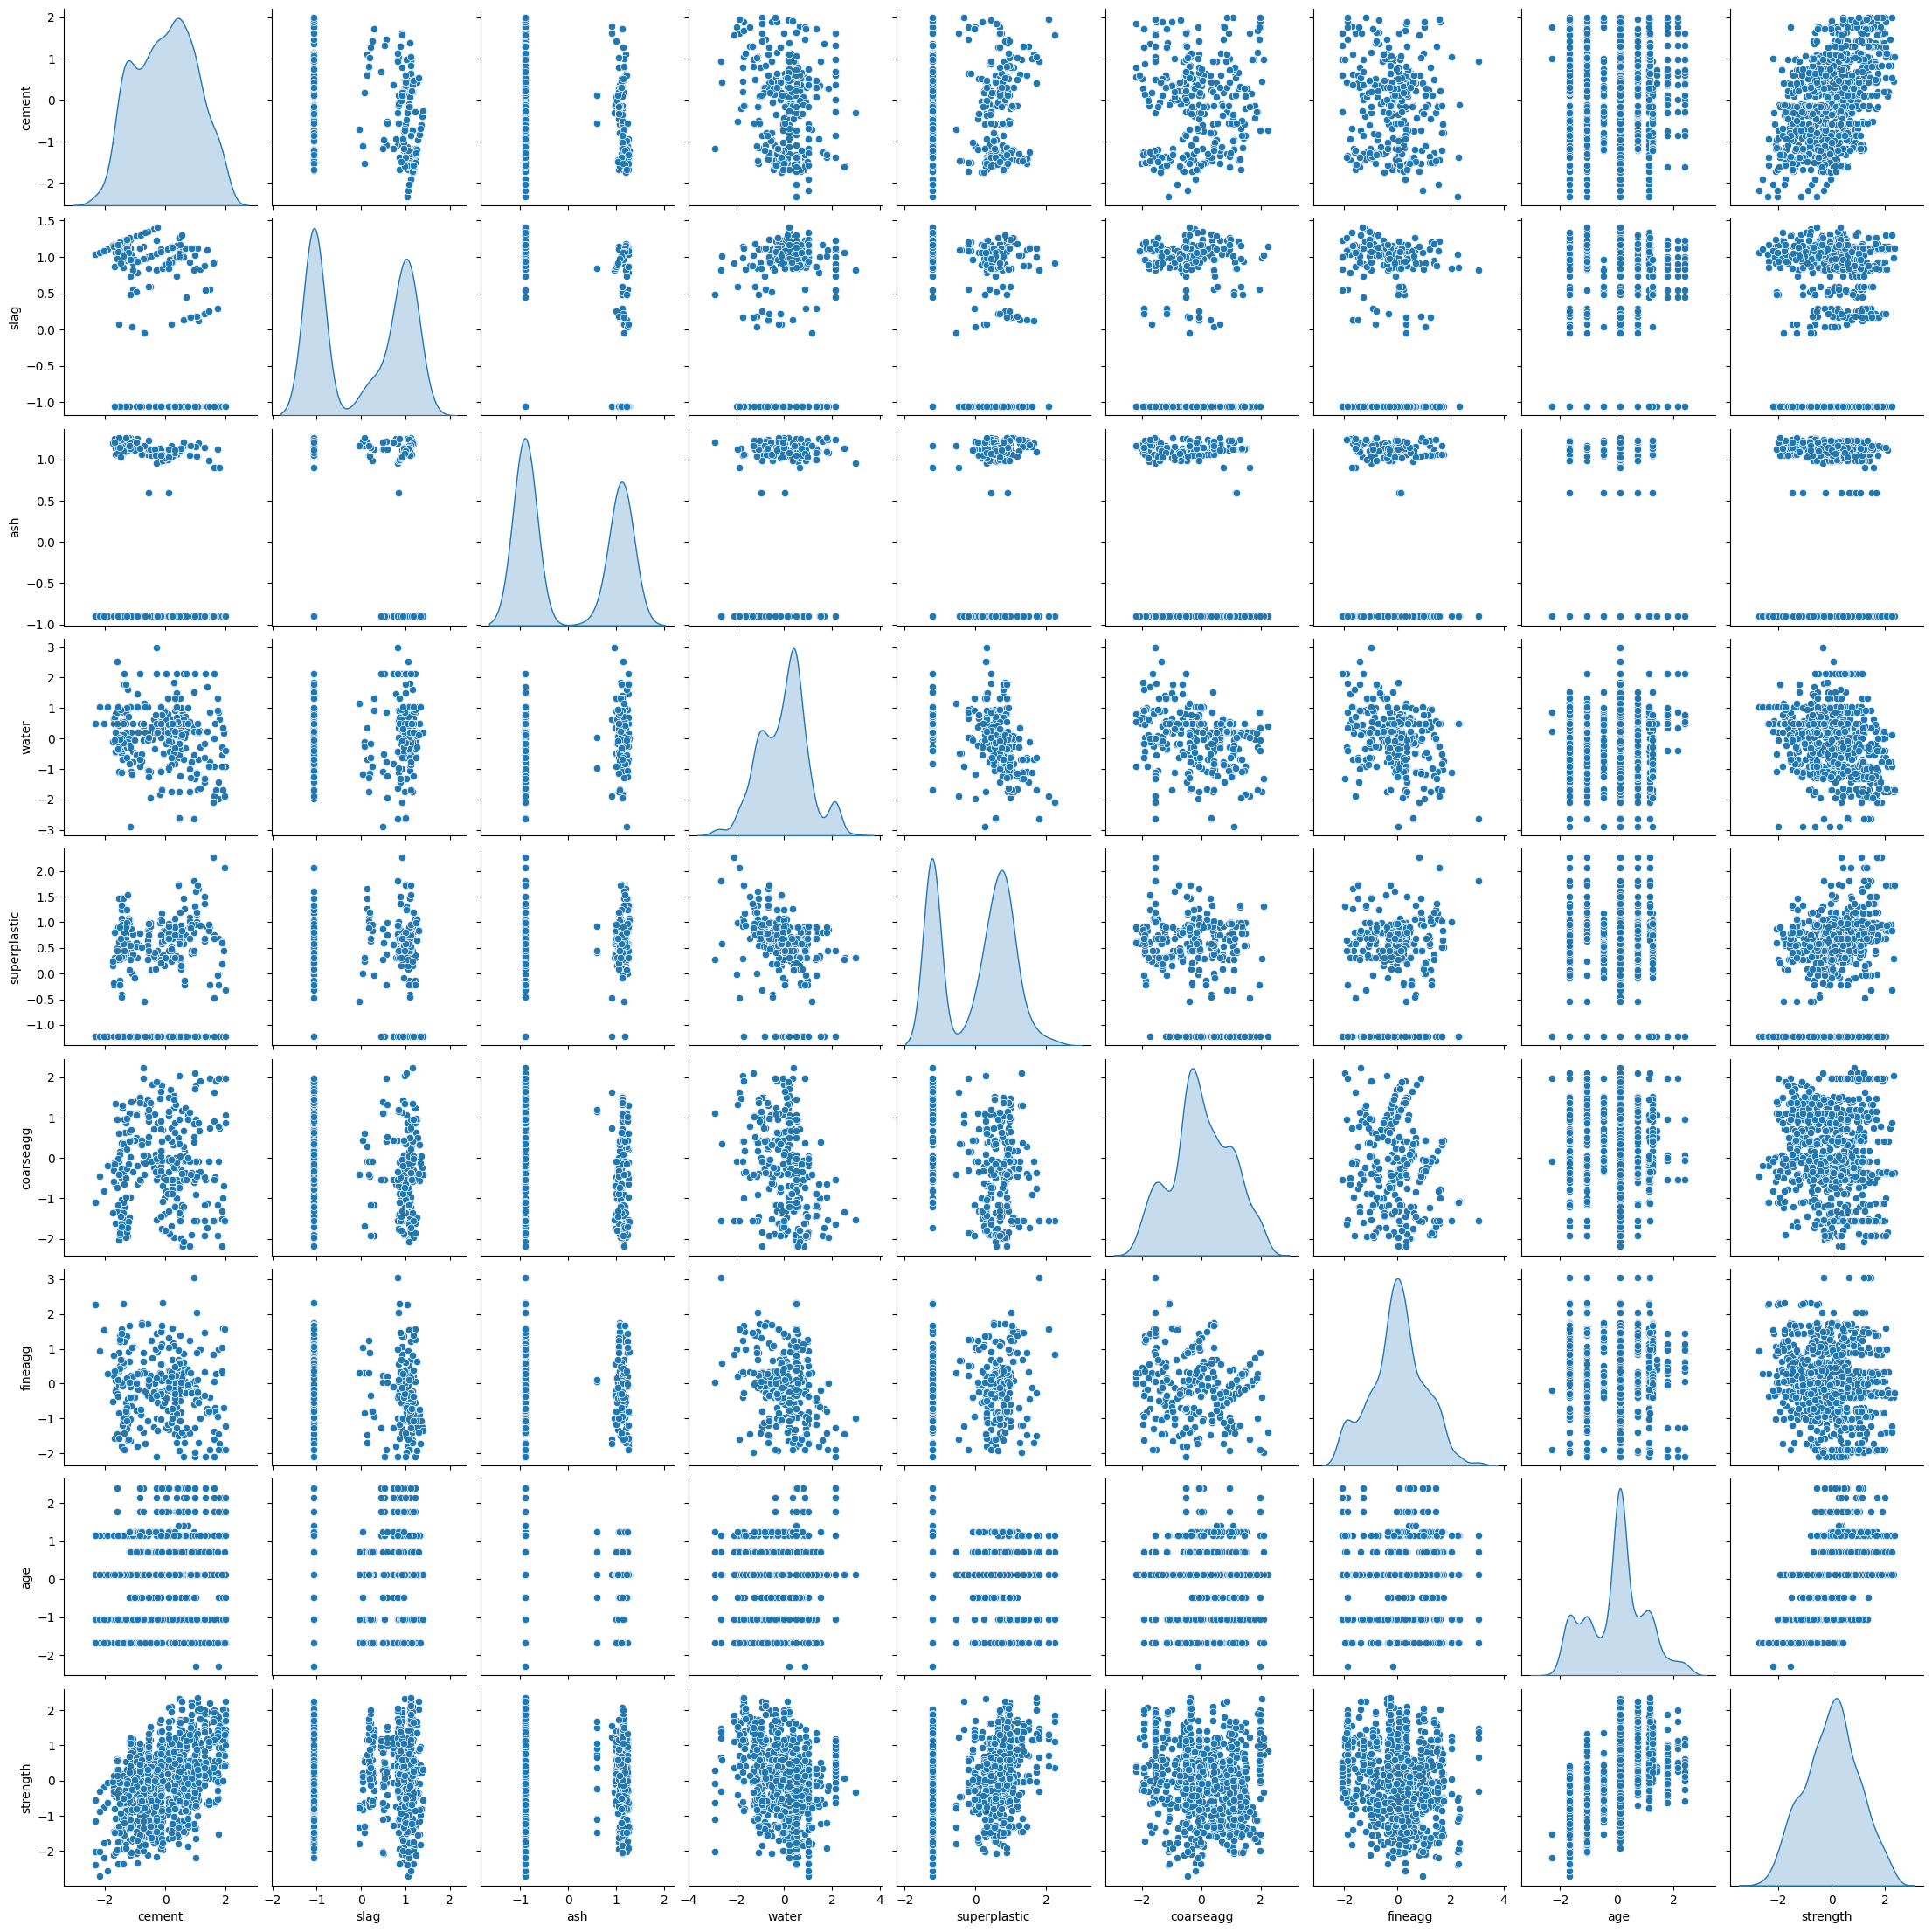

In [21]:
sns.pairplot(power_data,diag_kind='kde')

In [19]:
from sklearn.pipeline import Pipeline
pipe=Pipeline((
    ("pt",PowerTransformer()),
    ("lr",LinearRegression())
))
pipe.fit(x_train,y_train)
print("Training Accuracy")
print(pipe.score(x_train,y_train))
print("Testing Accuracy")
print(pipe.score(x_test,y_test))


Training Accuracy
0.7966604485385335
Testing Accuracy
0.8337764165255289


In [20]:
#Hyperparameter Tuning
#Degree = 1 basic linear regression model , higher the degree more the overfitting, lower the degree more the underfitting
#Choose the ideal degree hyperparameter to get the most good fit model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
pipe = Pipeline((
("poly", PolynomialFeatures(degree=3)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))


Training R2
0.927031176767196
Testing R2
0.8835840235693739


In [21]:
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,x_train,y_train,cv=10)
print(scoreslr)

[0.85126087 0.85397807 0.88765363 0.83245144 0.86841609 0.76114409
 0.73794613 0.85820912 0.87456006 0.86964752]


In [25]:
np.mean(scoreslr)

np.float64(0.8395267019209018)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
pipe=Pipeline((
    ("pt",PowerTransformer()),
    ("gbr",GradientBoostingRegressor(n_estimators=100,random_state=1))
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))

Training R2
0.9480781185823512
Testing R2
0.9108191389432243


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid to search over
param_grid = {'n_estimators': [50, 100, 150]} # Simplified parameter grid

# Create a GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'n_estimators': 150}
Best R2 score:  0.9082489076818883


In [31]:
#Build the final tuned model using the best hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=200,random_state=1)),
))
pipe.fit(x_train,y_train)

Pipeline(steps=[('pt', PowerTransformer()),
                ('lr',
                 GradientBoostingRegressor(n_estimators=200, random_state=1))])

Automatically created module for IPython interactive environment


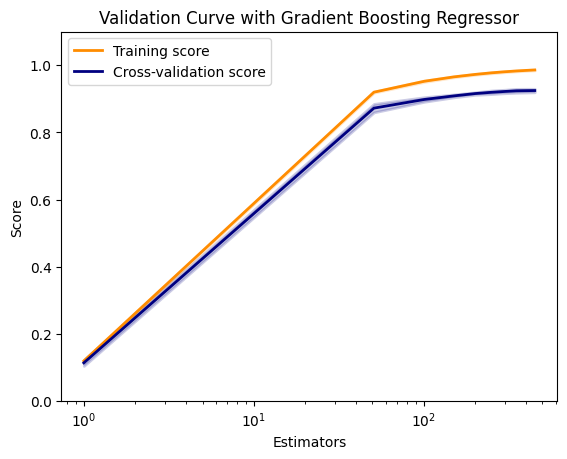

In [34]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.arange(1,500,50)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), x_train, y_train, param_name="n_estimators", param_range=param_range,
    n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()